In [1]:
library(Seurat)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject



# Processing files in Seurat

Can also read this vignette: https://satijalab.org/seurat/articles/pbmc3k_tutorial

## Reading in files and displaying them

In [5]:
# Note that "../../GEO_RawData/GSM5005815_V24Am" has three files: barcodes, features, and matrix.
#
# https://satijalab.org/seurat/reference/read10x
# https://www.rdocumentation.org/packages/SeuratObject/versions/5.0.1/topics/CreateSeuratObject

counts <- Read10X("./GSE164291/GEO_RawData/GSM5005815_V24Am")
st <- CreateSeuratObject(counts, project = "SampleProject")
st

An object of class Seurat 
31053 features across 4221 samples within 1 assay 
Active assay: RNA (31053 features, 0 variable features)

## Exploring and preprocessing files

In [7]:
# Look at central count matrix

GetAssay(st)

Assay data with 31053 features for 4221 cells
First 10 features:
 Xkr4, Gm1992, Gm37381, Rp1, Sox17, Gm37323, Mrpl15, Lypla1, Gm37988,
Tcea1 

In [9]:
# Look at Seurat metadata

head(st[[]])
dim(st[[]])

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCTGAGCTGCAAG-1,SampleProject,932,590
AAACCTGCAGCTTAAC-1,SampleProject,4750,2159
AAACCTGCAGGAACGT-1,SampleProject,1047,692
AAACCTGCATCCCACT-1,SampleProject,1806,890
AAACCTGGTAAACACA-1,SampleProject,1682,1087
AAACCTGGTAGCGTCC-1,SampleProject,1829,1048


[1] 4221    3

In [13]:
# Let's count the percent of mitochondrial genes per cell
# Patterns are based on regex. Learn more about that here: https://quickref.me/regex.html
#
# https://satijalab.org/seurat/reference/percentagefeatureset

st[["percent.mito"]] <- PercentageFeatureSet(st, pattern = "^mt-")
head(st[[]])
dim(st)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito
,<fct>,<dbl>,<int>,<dbl>
AAACCTGAGCTGCAAG-1,SampleProject,932,590,2.467811
AAACCTGCAGCTTAAC-1,SampleProject,4750,2159,16.610526
AAACCTGCAGGAACGT-1,SampleProject,1047,692,15.090735
AAACCTGCATCCCACT-1,SampleProject,1806,890,4.374308
AAACCTGGTAAACACA-1,SampleProject,1682,1087,6.658740
AAACCTGGTAGCGTCC-1,SampleProject,1829,1048,10.989612


[1] 31053  4221

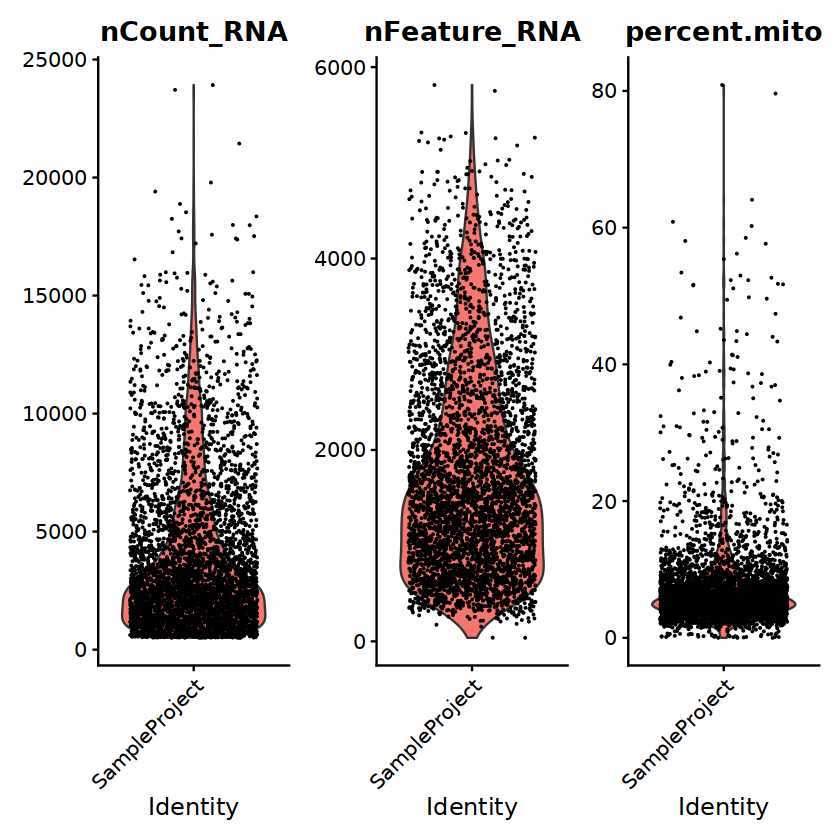

In [16]:
# Let's look at the distribution of counts, features, and percent.mito
#
# https://satijalab.org/seurat/reference/vlnplot

VlnPlot(st, features = c("nCount_RNA", "nFeature_RNA", "percent.mito"))

In [14]:
# Let's subset out genes that exceed 20% mitochondrial DNA
#
# Subsetting tutorial: https://satijalab.org/seurat/articles/essential_commands.html#subsetting-and-merging 

st_sub <- subset(st, percent.mito <= 20)
head(st_sub[[]])
dim(st_sub)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito
,<fct>,<dbl>,<int>,<dbl>
AAACCTGAGCTGCAAG-1,SampleProject,932,590,2.467811
AAACCTGCAGCTTAAC-1,SampleProject,4750,2159,16.610526
AAACCTGCAGGAACGT-1,SampleProject,1047,692,15.090735
AAACCTGCATCCCACT-1,SampleProject,1806,890,4.374308
AAACCTGGTAAACACA-1,SampleProject,1682,1087,6.658740
AAACCTGGTAGCGTCC-1,SampleProject,1829,1048,10.989612


[1] 31053  4062

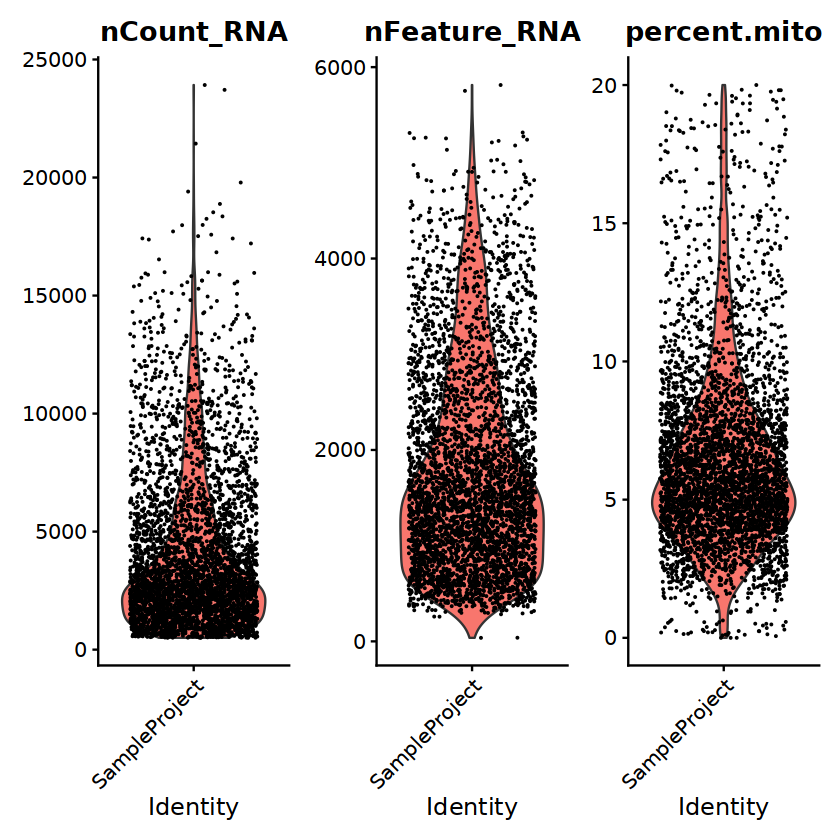

In [17]:
# Let's look at the distribution of counts, features, and percent.mito
# 
# See above for VlnPlot reference.

VlnPlot(st_sub, features = c("nCount_RNA", "nFeature_RNA", "percent.mito"))

In [25]:
# Let's normalize count data and find variable features, both of which are done by SCTransform.
#
# https://satijalab.org/seurat/reference/sctransform

st <- SCTransform(st)
head(st[[]])

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 15895 by 4221

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4221 cells



  |======================================================================| 100%


Found 123 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 15895 genes



  |======================================================================| 100%


Computing corrected count matrix for 15895 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.487838 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<int>
AAACCTGAGCTGCAAG-1,SampleProject,932,590,2.467811,2280,651
AAACCTGCAGCTTAAC-1,SampleProject,4750,2159,16.610526,3383,2119
AAACCTGCAGGAACGT-1,SampleProject,1047,692,15.090735,2335,762
AAACCTGCATCCCACT-1,SampleProject,1806,890,4.374308,2421,892
AAACCTGGTAAACACA-1,SampleProject,1682,1087,6.658740,2267,1095
AAACCTGGTAGCGTCC-1,SampleProject,1829,1048,10.989612,2351,1049


SCTAssay data with 15895 features for 4221 cells, and 1 SCTModel(s) 
Top 10 variable features:
 Cd74, Apoe, H2-Ab1, H2-Aa, H2-Eb1, C1qb, C1qa, Lyz2, 1500015O10Rik,
Igfbp6 

[1] "Cd74"   "Apoe"   "H2-Ab1" "H2-Aa"  "H2-Eb1" "C1qb"

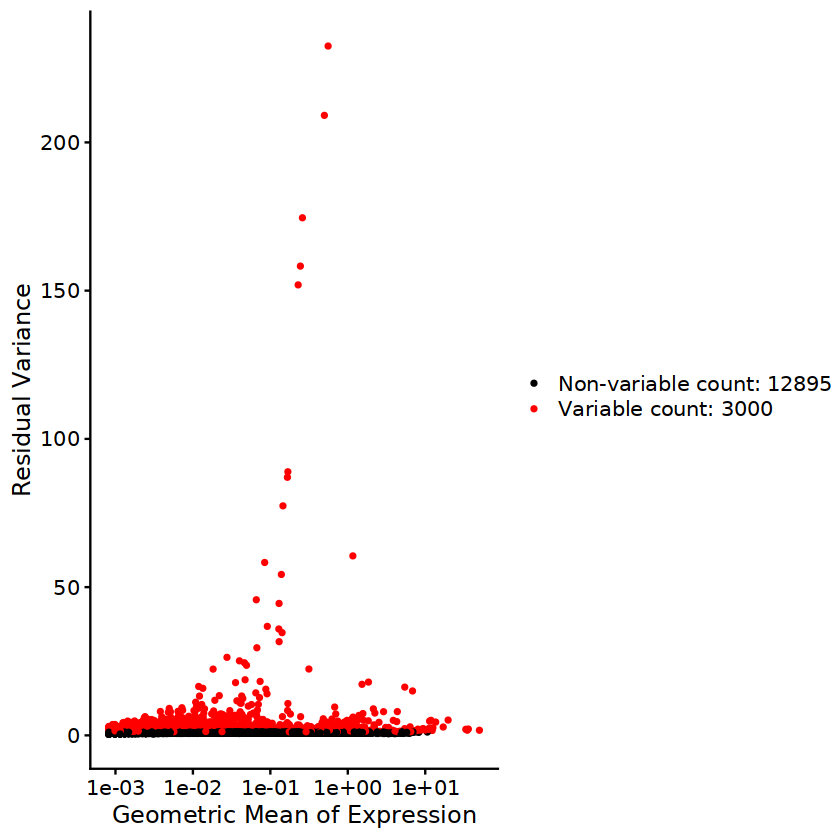

In [26]:
# You can see the variable features in the assay data.
#
# https://satijalab.org/seurat/reference/variablefeatureplot
# https://rdocumentation.org/packages/Seurat/versions/3.1.1/topics/VariableFeatures

GetAssay(st)
head(VariableFeatures(st))
VariableFeaturePlot(st)

## Visualizing single-cell data

Two steps: making low-dimensional representations and then displaying them.

PC_ 1 
Positive:  Tppp3, Ccdc153, Nupr1, Mt1, Chchd10, Tmem212, 4933434E20Rik, Dynlrb2, Ifitm1, Fam183b 
	   Vpreb3, S100a6, Gm19935, Tuba1a, Elof1, Tubb4b, Hsp90aa1, Tm4sf1, 1110017D15Rik, Cfap126 
	   Dynll1, 1700007K13Rik, Mt2, Sntn, 1700016K19Rik, Timp4, Rsph1, Hdc, 1700024G13Rik, Foxj1 
Negative:  Tmsb4x, Apoe, Cd74, C1qb, C1qa, H2-Aa, H2-Eb1, H2-Ab1, Fcer1g, Tyrobp 
	   C1qc, Ctss, Cst3, Cd52, B2m, Lyz2, Hexb, Wfdc17, Aif1, Ms4a7 
	   Laptm5, Ly86, H2-DMa, Ccl4, Fxyd5, Cd14, H2-D1, Coro1a, Fcgr3, Trem2 
PC_ 2 
Positive:  C1qb, C1qa, H2-Eb1, H2-Aa, H2-Ab1, Cd74, C1qc, Apoe, Fcer1g, Tyrobp 
	   Ctss, Lyz2, Cd52, Cst3, Nupr1, Tppp3, Ccdc153, Wfdc17, Aif1, Mt1 
	   Hexb, Ms4a7, Ly86, Laptm5, Tmsb4x, Tmem212, H2-DMa, B2m, 4933434E20Rik, Dynlrb2 
Negative:  Ovgp1, 1500015O10Rik, Ltf, Gstm2, Plat, Ier3, Rpl13, Rps19, Hspb1, Rps5 
	   Chd9, Slc1a3, Eef1a1, Tmsb10, Aldoc, Lcn2, Rps14, Igfbp4, Plet1, Selenom 
	   Fn1, Rpl14, Rps6, Krt18, Cd9, Rpl18a, Marcksl1, Rpl23a, Clu, Gstt2 
PC_ 3 
Po

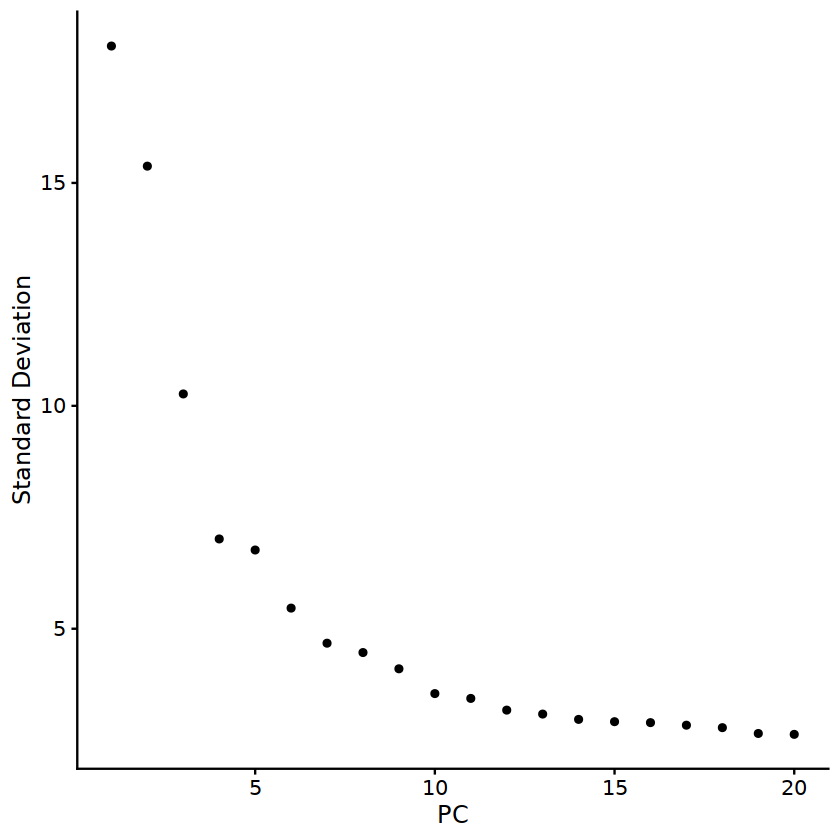

In [31]:
# Generate a PCA plot. Find highly informative components with ElbowPlot.

st <- RunPCA(st)
ElbowPlot(st)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:47:01 UMAP embedding parameters a = 0.9922 b = 1.112

18:47:01 Read 4221 rows and found 5 numeric columns

18:47:01 Using Annoy for neighbor search, n_neighbors = 30

18:47:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:47:02 Writing NN index file to temp file /tmp/RtmpaRlXhy/file13256456a12e0

18:47:02 Searching Annoy index using 1 thread, search_k = 3000

18:47:03 Annoy recall = 100%

18:47:04 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

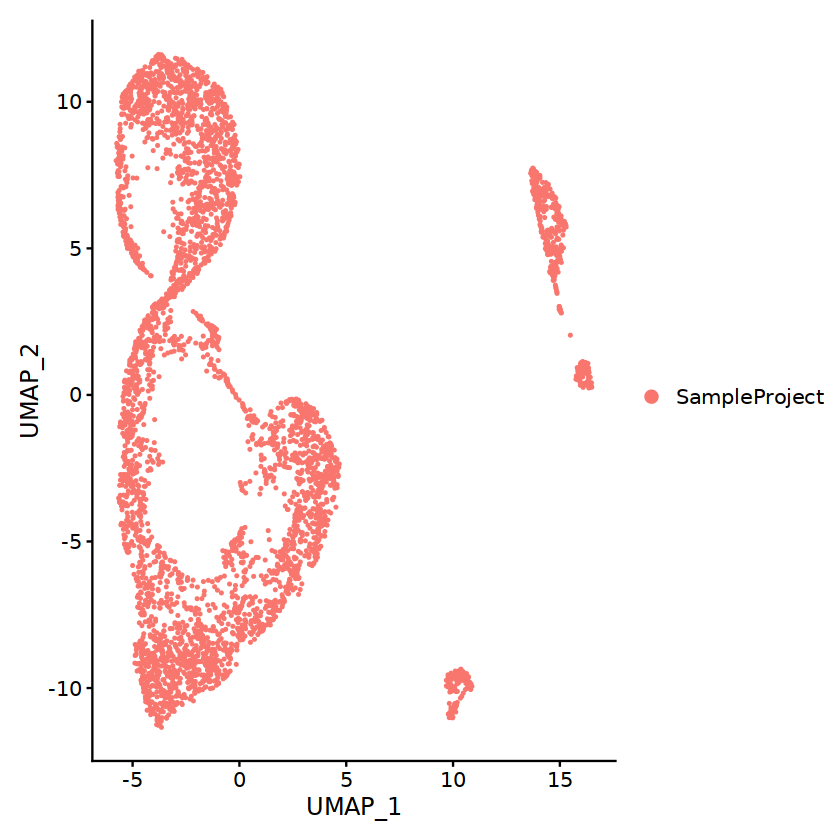

In [32]:
# Generate a low-dimensional representation of our data with UMAP.
# Use the five most informative principal components since that corresponds to the "elbow" of the elbow plot.
# Note we haven't clustered the points yet! Very little to see here.

st <- RunUMAP(st, dims = 1:5)
DimPlot(st)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4221
Number of edges: 132268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8552
Number of communities: 13
Elapsed time: 0 seconds


,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>
AAACCTGAGCTGCAAG-1,SampleProject,932,590,2.467811,2280,651,0,0
AAACCTGCAGCTTAAC-1,SampleProject,4750,2159,16.610526,3383,2119,9,9
AAACCTGCAGGAACGT-1,SampleProject,1047,692,15.090735,2335,762,8,8
AAACCTGCATCCCACT-1,SampleProject,1806,890,4.374308,2421,892,0,0
AAACCTGGTAAACACA-1,SampleProject,1682,1087,6.658740,2267,1095,8,8
AAACCTGGTAGCGTCC-1,SampleProject,1829,1048,10.989612,2351,1049,2,2


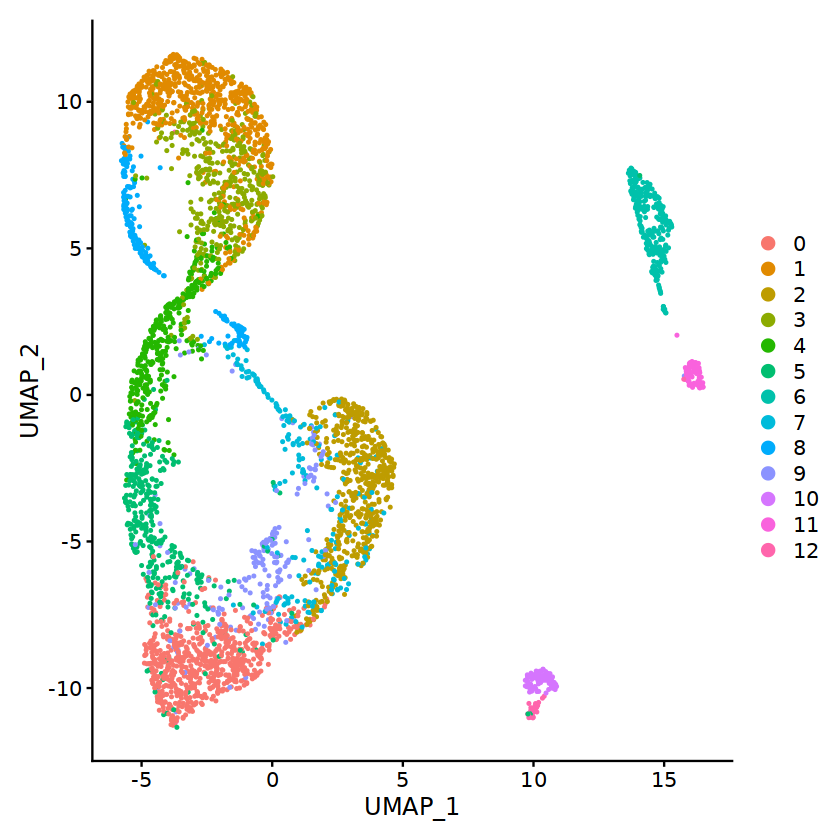

In [34]:
# Perform clustering.

st <- FindNeighbors(st)
st <- FindClusters(st)
DimPlot(st)
head(st[[]])

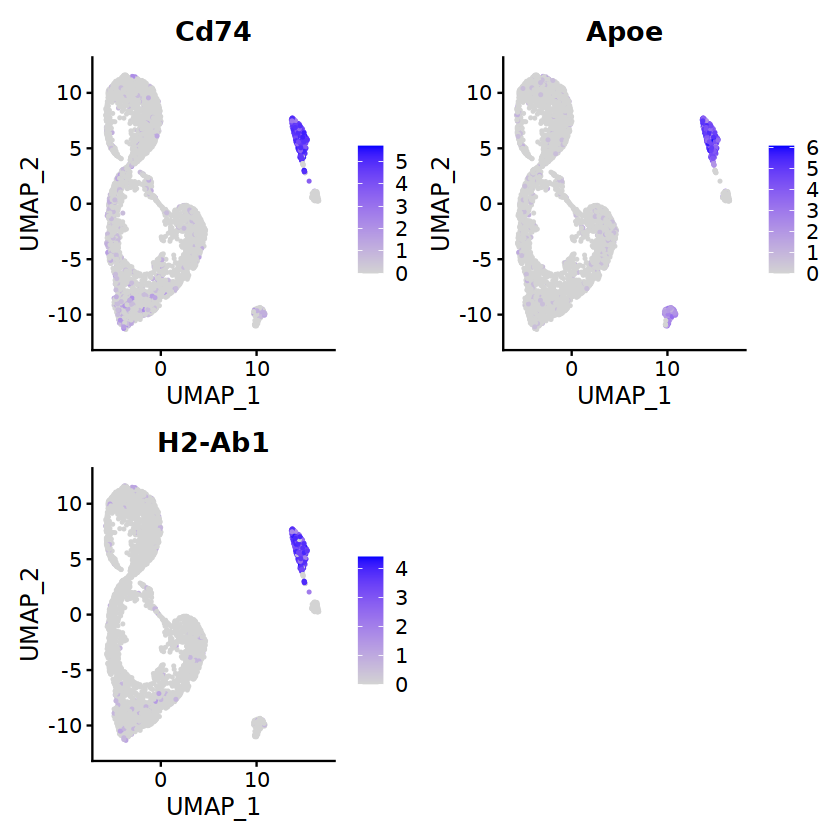

In [35]:
# Plot some genes of interest.

FeaturePlot(st, features = c('Cd74','Apoe','H2-Ab1'))

In [38]:
# Find all marker genes per cluster.
# Note that the parameters are important in shaping which markers are returned.

marker_table <- FindAllMarkers(st,
                              logfc.threshold = 0.25,
                              min.pct = 0.1,
                              only.pos = FALSE,
                              min.cells.feature = 3,
                              min.cells.group = 3)
head(marker_table)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Gstm2,2.246615e-245,1.4585295,0.987,0.757,3.570995e-241,0,Gstm2
Lcn2,1.035085e-233,1.5526760,0.827,0.262,1.645267e-229,0,Lcn2
Rps5,2.650631e-230,1.0118562,1.000,0.985,4.213177e-226,0,Rps5
Rpl13,5.203086e-223,0.9191687,1.000,0.998,8.270305e-219,0,Rpl13
Rbp1,9.145777e-208,1.1602879,0.861,0.318,1.453721e-203,0,Rbp1
Rplp0,1.982458e-204,0.9383264,1.000,0.979,3.151116e-200,0,Rplp0


In [39]:
# Write information to a file so you can look at it in another program like Excel.

write.csv(marker_table, "AllClusterMarkers.csv")